In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
raw = pd.read_csv("CapDimData.dat",header= None)
raw.columns = (["x","y","z"])
raw.head()

,x,y,z
0,-12.139,-18.644,30.953
1,-12.243,-18.796,31.057
2,-12.348,-18.948,31.165
3,-12.454,-19.100,31.276
4,-12.561,-19.252,31.391


In [22]:
data = raw[["x","z"]]
data = data.to_numpy()

In [36]:
maxs = np.zeros(len(data[1]))
maxs

array([0., 0.])

In [62]:
def dimension_c(data, epsilon):

    mins = np.zeros(len(data[1]))
    maxs = np.zeros(len(data[1]))

    for i in range(len(maxs)):
        maxs[i] = max(data[:,i])
    for i in range(len(mins)):
        mins[i] = min(data[:,i])

    
    box_matrix = np.zeros((int(np.ceil((maxs[0] - mins[0])/epsilon)), int(np.ceil((maxs[1]- mins[1])/epsilon))))
    for index in range(len(data)):
        xcurr = data[index,:]
        ind = np.zeros((len(data[0])))
        for i in range(len(ind)):
            ind[i] = np.ceil((xcurr[i] - mins[i])/epsilon)
            if ind[i]==0:
                ind[i]=1
    
        box_matrix[int(ind[0])-1,int(ind[1])-1] =1

    N = sum(sum(box_matrix))    


    return N
dimension_c(data,0.5)

4342.0

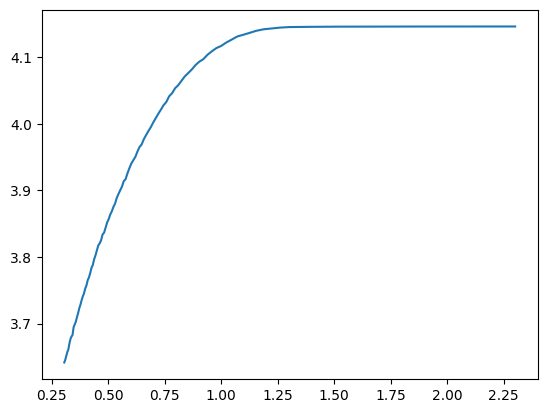

In [63]:
eps = np.arange(0.005,0.5,0.005)
Nep = []
for i in eps:
    N = dimension_c(data,i)
    Nep.append(N)

plt.plot(np.log10(1/eps), np.log10(Nep))

In [64]:
np.log10(1/0.5)

0.3010299956639812

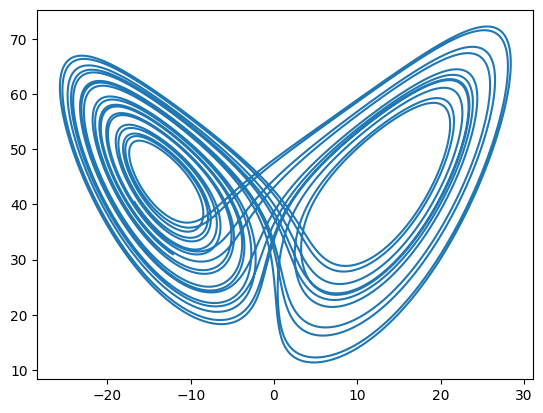

In [9]:
plt.plot(data['x'],data['z'])